<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <p style="padding: 10px;
              color:white;">
I tried to make this Kernel simple and easy to understand. In my previous kernels I have only used matplotlib and seaborn for data visualizations but in this kernel I am also including plotly. You can see seaborn graphs here and there too.<br/><br/>

        If you like this notebook, please give it an <span style="color:#F28835;"><b><i>upvote</i></b></span> as it keeps me motivated to create more quality kernels.<br/> I hope you like this kernel.
    </p>
</div>

In [1]:
# For downloading static plotly graphs
# import sys
# !conda install --yes --prefix {sys.prefix} -c plotly plotly-orca 


import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from bs4 import BeautifulSoup
import requests 
import folium 
from folium import plugins
import datetime
from sklearn.preprocessing import OrdinalEncoder

# Predictions
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression


sns.set_style('whitegrid')
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-in-india/IndividualDetails.csv
/kaggle/input/covid19-in-india/StatewiseTestingDetails.csv
/kaggle/input/covid19-in-india/HospitalBedsIndia.csv
/kaggle/input/covid19-in-india/covid_19_india.csv
/kaggle/input/covid19-in-india/AgeGroupDetails.csv
/kaggle/input/covid19-in-india/ICMRTestingLabs.csv
/kaggle/input/covid19-in-india/population_india_census2011.csv
/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/full_grouped.csv


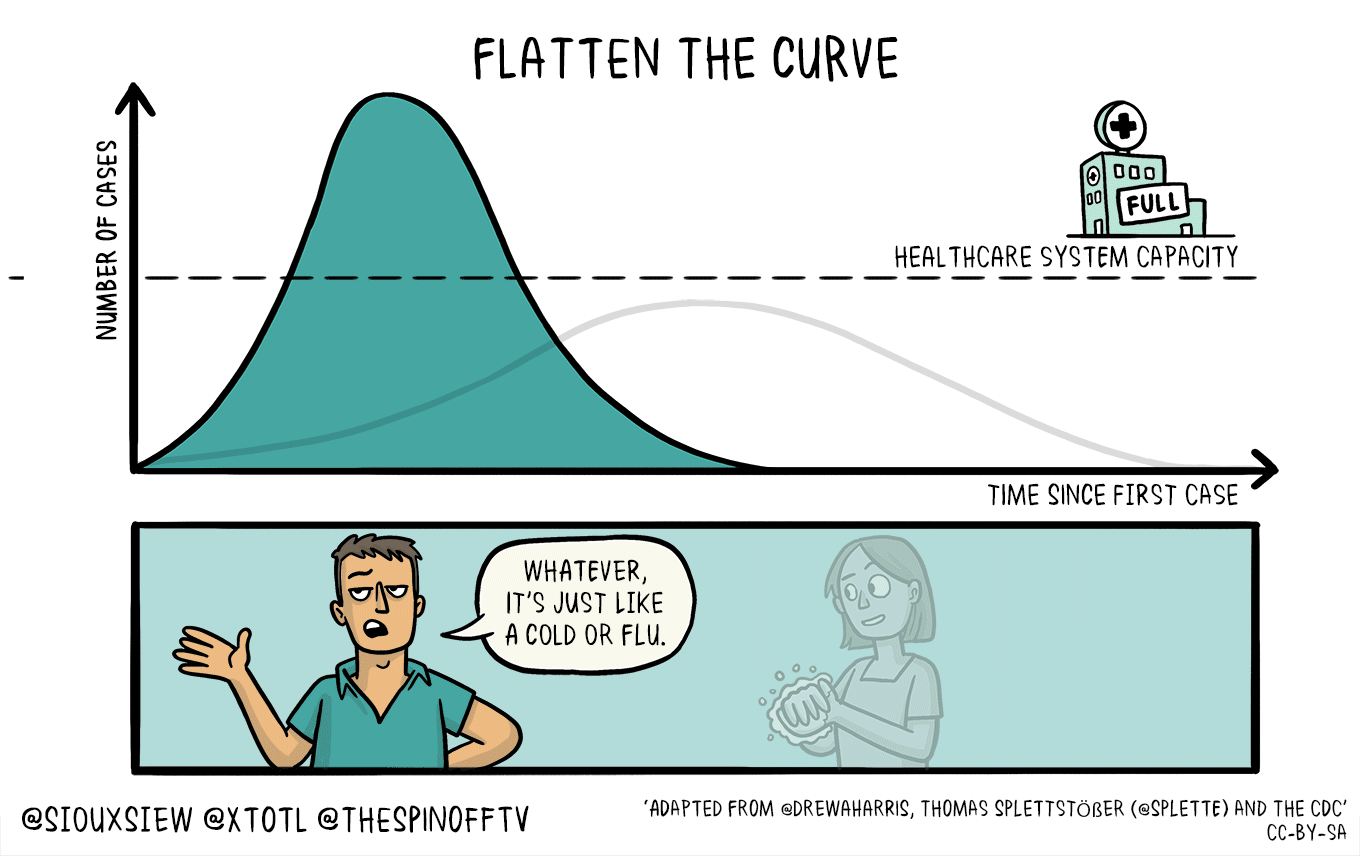

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:4px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>Loading Data</h1>
</div>

In [2]:
age_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
hospital_data = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
labs_data = pd.read_csv('../input/covid19-in-india/ICMRTestingLabs.csv')
covid_data = pd.read_csv('../input/covid19-in-india/covid_19_india.csv')
world_data = pd.read_csv('../input/corona-virus-report/covid_19_clean_complete.csv')

In [3]:
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli and Daman and Diu":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
    "Daman and Diu":[20.4283,72.8397] , 
    'State Unassigned':[0,0]
}

In [4]:
india_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
loc_india = pd.io.json.json_normalize(india_json['data']['statewise'])
loc_india = loc_india.set_index("state")

loc_india["Lat"] = ""
loc_india["Long"] = ""
for index in loc_india.index :
    loc_india.loc[loc_india.index == index,"Lat"] = locations[index][0]
    loc_india.loc[loc_india.index == index,"Long"] = locations[index][1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>1. Age Data</h1>
</div>

In [5]:
# age_data.head(15)

A fancy table:

In [6]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(age_data.columns),
                fill_color='lightpink',
                align='left'),
    cells=dict(values=[age_data.Sno, age_data.AgeGroup, age_data.TotalCases, age_data.Percentage],
               fill_color='lightblue',
               align='left'))
])

fig.show()

In [7]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [8]:
# plt.subplots(figsize=(10, 7))
# ax = sns.barplot(age_data['AgeGroup'], age_data['TotalCases'], palette='spring')
# ax.set(xlabel='AgeGroup', ylabel='Total Cases')

In [9]:
figure = px.bar(age_data, x=age_data['AgeGroup'], y=age_data['TotalCases'], color='AgeGroup')
figure.update_layout(plot_bgcolor='rgb(275, 275, 275)',
                     showlegend=False)
# figure.layout.template = 'plotly_dark'

figure.data[2].marker.line.width = 3
figure.data[2].marker.line.color = "black"

figure.show()

In [10]:
percent = age_data['Percentage']

In [11]:
percent

0     3.18%
1     3.90%
2    24.86%
3    21.10%
4    16.18%
5    11.13%
6    12.86%
7     4.05%
8     1.45%
9     1.30%
Name: Percentage, dtype: object

In [12]:
for i in range(len(percent)):
    percent[i] = percent[i][:-1]

In [13]:
percent

0     3.18
1     3.90
2    24.86
3    21.10
4    16.18
5    11.13
6    12.86
7     4.05
8     1.45
9     1.30
Name: Percentage, dtype: object

In [14]:
percent = percent.astype(float)

In [15]:
percent

0     3.18
1     3.90
2    24.86
3    21.10
4    16.18
5    11.13
6    12.86
7     4.05
8     1.45
9     1.30
Name: Percentage, dtype: float64

In [16]:
percent = percent.astype(int)

In [17]:
percent

0     3
1     3
2    24
3    21
4    16
5    11
6    12
7     4
8     1
9     1
Name: Percentage, dtype: int64

In [18]:
age_data['Percentage'] = percent

In [19]:
age_data.head(3)

Sno AgeGroup  TotalCases  Percentage
0    1      0-9          22           3
1    2    10-19          27           3
2    3    20-29         172          24

In [20]:
fig = go.Figure()
fig.add_trace(go.Pie(values=age_data['Percentage'], labels=age_data['AgeGroup'], hole=.3, pull=[0, 0, 0.1, 0, 0]))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=700)

fig.data[0].marker.line.width = 3
fig.data[0].marker.line.color = "black"

fig.show()

In [21]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 448.0+ bytes


Alright, now we only have one categorical value. Lets take care of it quickly.

In [22]:
age_data['AgeGroup']

0        0-9
1      10-19
2      20-29
3      30-39
4      40-49
5      50-59
6      60-69
7      70-79
8       >=80
9    Missing
Name: AgeGroup, dtype: object

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=age_data['AgeGroup'],y=age_data['TotalCases'], 
                         line_shape='spline',fill='tonexty')) 

fig.update_layout(title="Age wise Confirmed Cases in India",yaxis_title="Total Number of cases",xaxis_title="Age Group")

fig.update_layout(plot_bgcolor='rgb(275, 275, 275)',height=600)

fig.show()

In [24]:
age_group = age_data['AgeGroup']

Here:
* 0-9 means 1
* 10-19 means 2
* 20-29 means 3
* 30-39 means 4

and so on...

In [25]:
k = 1
for i in range(len(age_group)):
    age_group[i] = k
    k += 1

In [26]:
age_group

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: AgeGroup, dtype: object

In [27]:
age_data['AgeGroup'] = age_group.astype(int)

In [28]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Sno         10 non-null     int64
 1   AgeGroup    10 non-null     int64
 2   TotalCases  10 non-null     int64
 3   Percentage  10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


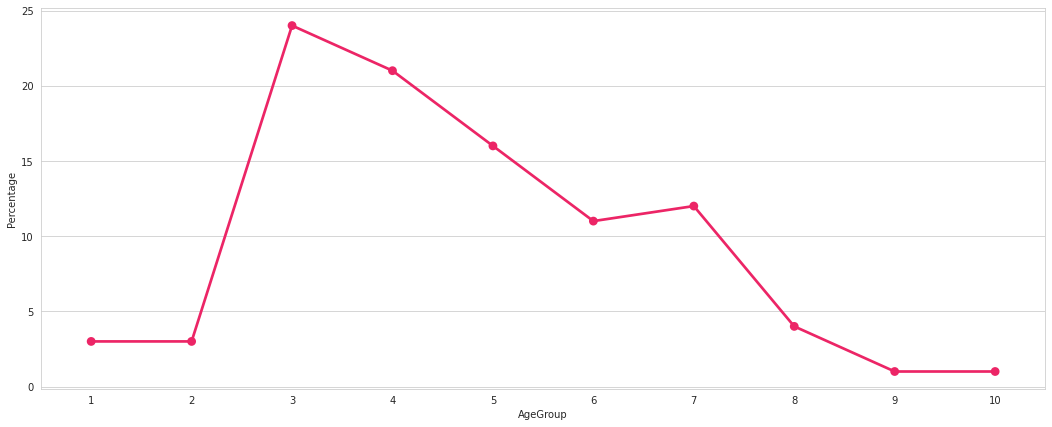

In [29]:
plt.subplots(figsize=(18,7))
sns.pointplot(x=age_data['AgeGroup'], y=age_data['Percentage'], color='#EC2566')

In [30]:
my_pic = px.scatter(age_data, x='AgeGroup', y='Percentage', color='AgeGroup', size='Percentage')
my_pic

In [31]:
# my_pic.write_image('hello.png')

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           background-color:#5642C5;
           border-radius:5px;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>2. Hospital Data</h1>
</div>

In [32]:
hospital_data.head(3)

Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
0    1  Andaman & Nicobar Islands                           27   
1    2             Andhra Pradesh                         1417   
2    3          Arunachal Pradesh                          122   

   NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                               4                           NaN   
1                             198                          31.0   
2                              62                           NaN   

   NumDistrictHospitals_HMIS  TotalPublicHealthFacilities_HMIS  \
0                          3                                34   
1                         20                              1666   
2                         15                               199   

   NumPublicBeds_HMIS  NumRuralHospitals_NHP18  NumRuralBeds_NHP18  \
0                1246                       27                 575   
1               60799                      193                6480   
2                2320                      208                2136   

   NumUrbanHospitals_NHP18  NumUrbanBeds_NHP18  
0                        3                 500  
1                       65               16658  
2                       10                 268

> Note: HMIS - Health Management Information System

Let's see what we are working with here with our three solid pillars: <code>df.columns</code>, <code>df.info()</code>, and <code>df.describe()</code>

In [33]:
hospital_data.columns

Index(['Sno', 'State/UT', 'NumPrimaryHealthCenters_HMIS',
       'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
       'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS',
       'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18'],
      dtype='object')

In [34]:
hospital_data.describe()

Sno  NumCommunityHealthCenters_HMIS  \
count  37.000000                       37.000000   
mean   19.000000                      300.972973   
std    10.824355                      907.160512   
min     1.000000                        2.000000   
25%    10.000000                       17.000000   
50%    19.000000                       82.000000   
75%    28.000000                      229.000000   
max    37.000000                     5568.000000   

       NumSubDistrictHospitals_HMIS  NumDistrictHospitals_HMIS  \
count                     30.000000                  37.000000   
mean                      83.666667                  54.216216   
std                      229.572817                 163.173584   
min                        1.000000                   1.000000   
25%                        6.000000                   9.000000   
50%                       25.500000                  23.000000   
75%                       63.250000                  37.000000   
max                     1255.000000                1003.000000   

       TotalPublicHealthFacilities_HMIS  NumPublicBeds_HMIS  \
count                         37.000000           37.000000   
mean                        2039.189189        39947.243243   
std                         6130.345694       120196.898697   
min                            8.000000          250.000000   
25%                          114.000000         2666.000000   
50%                          683.000000        13527.000000   
75%                         1867.000000        39511.000000   
max                        37725.000000       739024.000000   

       NumRuralHospitals_NHP18  NumRuralBeds_NHP18  NumUrbanHospitals_NHP18  \
count                37.000000           37.000000                37.000000   
mean               1070.810811        15112.864865               203.891892   
std                3278.430865        45752.664986               616.352568   
min                   0.000000            0.000000                 0.000000   
25%                  24.000000          630.000000                14.000000   
50%                 273.000000         5805.000000                59.000000   
75%                 705.000000        10944.000000               149.000000   
max               19810.000000       279588.000000              3772.000000   

       NumUrbanBeds_NHP18  
count           37.000000  
mean         23306.648649  
std          70502.578529  
min              0.000000  
25%           1393.000000  
50%           5228.000000  
75%          18819.000000  
max         431173.000000

In [35]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>2.1. Handling Missing Data</h1>
</div>

In [36]:
hospital_data.isnull().sum()

Sno                                 0
State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

Alright, our data has only one column which is missing values. We must take care of it before moving forward.

In [37]:
hospital_data['NumSubDistrictHospitals_HMIS'].describe()

count      30.000000
mean       83.666667
std       229.572817
min         1.000000
25%         6.000000
50%        25.500000
75%        63.250000
max      1255.000000
Name: NumSubDistrictHospitals_HMIS, dtype: float64

Lets analyze the above output for a second. We see that the standard deviation is huge!! The maximum number is 1255 and the minimum is 1. Filling the missing values with mean won't be a good choice here.

**We take a look at the entire table, it may be that missing value represents that there are no 'SubDistrictHospitals' in that State. This seems more reliable and we will fill all the missing values with 0.**

In [38]:
hospital_data['NumSubDistrictHospitals_HMIS'] = hospital_data['NumSubDistrictHospitals_HMIS'].fillna(0)

### Something in disguise
Pay attention to the DataTypes above. We see that <code>'NumSubDistrictHospitals_HMIS'</code> is of <code><i>float64</i></code> data type which doesn't seem right. Lets investigate further.

In [39]:
hospital_data['NumSubDistrictHospitals_HMIS'].head(10)

0     0.0
1    31.0
2     0.0
3    14.0
4    33.0
5     1.0
6    12.0
7     1.0
8     0.0
9     9.0
Name: NumSubDistrictHospitals_HMIS, dtype: float64

We must convert this to <code><i>int</i></code>

In [40]:
hospital_data['NumSubDistrictHospitals_HMIS'] = hospital_data['NumSubDistrictHospitals_HMIS'].astype(int)

In [41]:
hospital_data['NumSubDistrictHospitals_HMIS'].head()

0     0
1    31
2     0
3    14
4    33
Name: NumSubDistrictHospitals_HMIS, dtype: int64

Alright, we have less problems to worry for as we have taken care of missing data values. **But wait... there is something else** we seeeee

The column 'NumPrimaryHealthCenters_HMIS' is of <code><i>Categorical Data</i></code> type but instead it should be of <code><i>int</i></code> datatype.

In [42]:
hospital_data['NumPrimaryHealthCenters_HMIS']

0         27
1       1417
2        122
3       1007
4       2007
5         40
6        813
7          9
8          4
9        534
10        31
11      1770
12       500
13       516
14       702
15       343
16      2547
17       933
18         4
19      1420
20      2638
21        87
22       138
23        65
24       134
25      1360
26        40
27       521
28      2463
29        25
30      1854
31       788
32       114
33      3277
34       275
35      1374
36    29,899
Name: NumPrimaryHealthCenters_HMIS, dtype: object

Before we simply go and apply the <code>astype(int)</code> magic on this column, **there is an anomaly in this data in the last row**. The last row contains comma in the data. We must update this row.

In [43]:
hospital_data['NumPrimaryHealthCenters_HMIS'].iloc[36]

'29,899'

In [44]:
hospital_data['NumPrimaryHealthCenters_HMIS'].iloc[36] = '29899'

In [45]:
hospital_data['NumPrimaryHealthCenters_HMIS'] = hospital_data['NumPrimaryHealthCenters_HMIS'].astype(int)

In [46]:
hospital_data['NumPrimaryHealthCenters_HMIS']

0        27
1      1417
2       122
3      1007
4      2007
5        40
6       813
7         9
8         4
9       534
10       31
11     1770
12      500
13      516
14      702
15      343
16     2547
17      933
18        4
19     1420
20     2638
21       87
22      138
23       65
24      134
25     1360
26       40
27      521
28     2463
29       25
30     1854
31      788
32      114
33     3277
34      275
35     1374
36    29899
Name: NumPrimaryHealthCenters_HMIS, dtype: int64

In [47]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Sno                               37 non-null     int64 
 1   State/UT                          37 non-null     object
 2   NumPrimaryHealthCenters_HMIS      37 non-null     int64 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64 
 4   NumSubDistrictHospitals_HMIS      37 non-null     int64 
 5   NumDistrictHospitals_HMIS         37 non-null     int64 
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64 
 7   NumPublicBeds_HMIS                37 non-null     int64 
 8   NumRuralHospitals_NHP18           37 non-null     int64 
 9   NumRuralBeds_NHP18                37 non-null     int64 
 10  NumUrbanHospitals_NHP18           37 non-null     int64 
 11  NumUrbanBeds_NHP18                37 non-null     int64 
dtypes: int64(11), object(1)


In [48]:
num_cols = [col for col in hospital_data.columns
           if hospital_data[col].dtype!='object' and col != 'Sno']

In [49]:
num_cols

['NumPrimaryHealthCenters_HMIS',
 'NumCommunityHealthCenters_HMIS',
 'NumSubDistrictHospitals_HMIS',
 'NumDistrictHospitals_HMIS',
 'TotalPublicHealthFacilities_HMIS',
 'NumPublicBeds_HMIS',
 'NumRuralHospitals_NHP18',
 'NumRuralBeds_NHP18',
 'NumUrbanHospitals_NHP18',
 'NumUrbanBeds_NHP18']

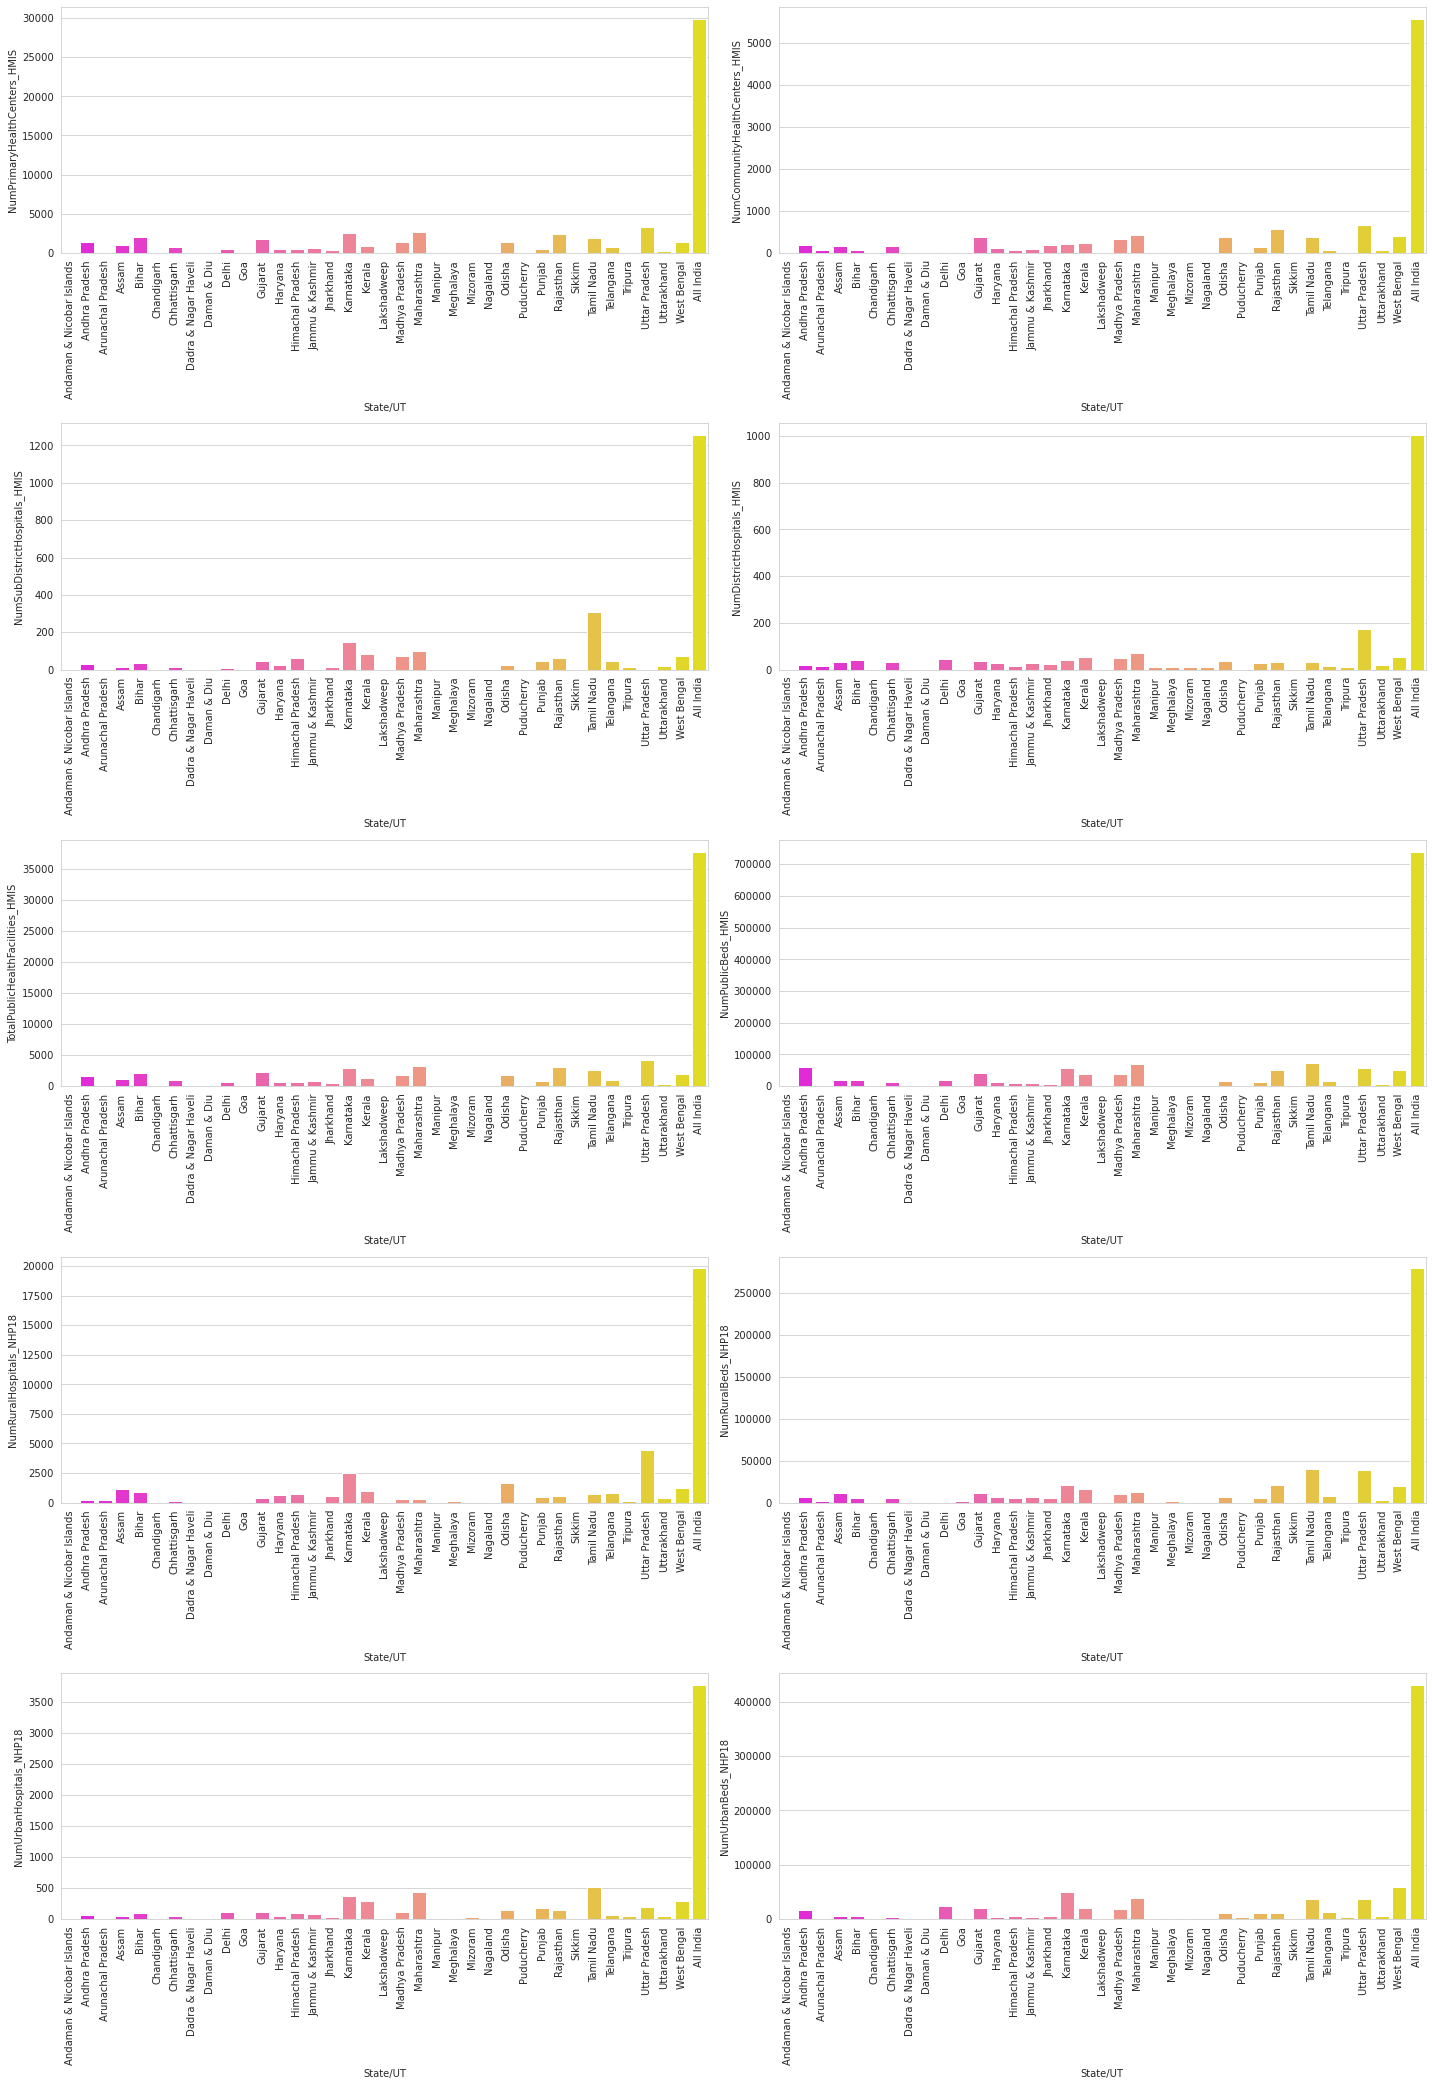

In [50]:
fig = plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    fig.add_subplot(9, 2, i+1)
    sns.barplot(x=hospital_data['State/UT'], y=hospital_data[num_cols[i]], palette='spring')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Lets closely look at some features.

In [51]:
hospital_data['State/UT'].iloc[36]

'All India'

### Number of Public Beds in Each State

In [52]:
# plt.subplots(figsize=(15, 7))
# fig = sns.barplot(x=hospital_data['State/UT'].iloc[:36], 
#                       y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
#                       palette='spring')
# plt.xticks(rotation=90)
# fig

In [53]:
fig = px.bar(hospital_data, 
             x=hospital_data['State/UT'].iloc[:36], 
             y=hospital_data['NumPublicBeds_HMIS'].iloc[:36], 
             color=hospital_data['NumPublicBeds_HMIS'].iloc[:36])

fig.update_layout(title={
        'text': "Num of Public Beds in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State/UT",
        yaxis_title="Number of Public Beds",
        plot_bgcolor='white')

In [54]:
hospital_data[['State/UT', 'NumPublicBeds_HMIS']].groupby(['State/UT']).mean().sort_values(by='NumPublicBeds_HMIS', ascending=False)

NumPublicBeds_HMIS
State/UT                                     
All India                              739024
Tamil Nadu                              72616
Maharashtra                             68998
Andhra Pradesh                          60799
Uttar Pradesh                           58310
Karnataka                               56333
Rajasthan                               51844
West Bengal                             51163
Gujarat                                 41129
Kerala                                  39511
Madhya Pradesh                          38140
Delhi                                   20572
Assam                                   19115
Bihar                                   17796
Telangana                               17358
Odisha                                  16497
Chhattisgarh                            14354
Haryana                                 13841
Punjab                                  13527
Jammu & Kashmir                         11342
Himachal Pradesh                         8706
Jharkhand                                7404
Uttarakhand                              6660
Tripura                                  4895
Meghalaya                                4585
Puducherry                               4462
Chandigarh                               3756
Goa                                      2666
Manipur                                  2562
Arunachal Pradesh                        2320
Mizoram                                  2312
Nagaland                                 1944
Andaman & Nicobar Islands                1246
Sikkim                                   1145
Dadra & Nagar Haveli                      568
Daman & Diu                               298
Lakshadweep                               250

**From the data above it is quite clear that Tamil Nadu has the most number of public beds in India followed by Maharashtra.**

### Total Public Health Facilities in Each State

In [55]:
fig = px.bar(hospital_data, 
             x=hospital_data['State/UT'].iloc[:36], 
             y=hospital_data['TotalPublicHealthFacilities_HMIS'].iloc[:36], 
             color=hospital_data['TotalPublicHealthFacilities_HMIS'].iloc[:36])

fig.update_layout(title={
        'text': "Num of Public Health Facilities in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="State/UT",
        yaxis_title="Number of Public Health Facilities",
        plot_bgcolor='white')

In [56]:
hs_public = hospital_data[['State/UT', 'TotalPublicHealthFacilities_HMIS']].groupby(['State/UT']).mean().sort_values(by='TotalPublicHealthFacilities_HMIS', ascending=False)
hs_public

TotalPublicHealthFacilities_HMIS
State/UT                                                   
All India                                             37725
Uttar Pradesh                                          4122
Maharashtra                                            3239
Rajasthan                                              3139
Karnataka                                              2943
Tamil Nadu                                             2581
Gujarat                                                2236
Bihar                                                  2146
West Bengal                                            1905
Madhya Pradesh                                         1867
Odisha                                                 1799
Andhra Pradesh                                         1666
Kerala                                                 1297
Assam                                                  1220
Chhattisgarh                                           1023
Telangana                                               932
Jammu & Kashmir                                         818
Punjab                                                  742
Haryana                                                 683
Himachal Pradesh                                        671
Delhi                                                   615
Jharkhand                                               558
Uttarakhand                                             383
Arunachal Pradesh                                       199
Meghalaya                                               180
Nagaland                                                166
Tripura                                                 157
Manipur                                                 114
Mizoram                                                  87
Puducherry                                               53
Chandigarh                                               47
Goa                                                      40
Andaman & Nicobar Islands                                34
Sikkim                                                   32
Dadra & Nagar Haveli                                     13
Lakshadweep                                              10
Daman & Diu                                               8

**From the data above it is quite clear that Uttar Pradesh has the most number of public health facilities in India followed by Maharashtra.**

A really cool looking 3d Graph... because why not?

In [57]:
fig = px.scatter_3d(hospital_data, x=hospital_data['State/UT'], 
                    y=hospital_data['NumPublicBeds_HMIS'], 
                    z=hospital_data['NumPrimaryHealthCenters_HMIS'],
                    color='State/UT')
fig.update_layout(scene_zaxis_type="log", showlegend=False, height=600)
fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>3. Testing Labs</h1>
</div>

In [58]:
labs_data.head(3)

lab  \
0  ICMR-Regional Medical Research Centre, Port Blair   
1  Tomo Riba Institute of Health & Medical Scienc...   
2  Sri Venkateswara Institute of Medical Sciences...   

                                             address  pincode        city  \
0  ICMR-Regional Medical Research Centre, Post Ba...   744103  Port Blair   
1  National Highway 52A, Old Assembly Complex, Na...   791110  Naharlagun   
2  Sri Venkateswara Institute of Medical Sciences...   517507    Tirupati   

                         state                   type  
0  Andaman and Nicobar Islands  Government Laboratory  
1            Arunachal Pradesh        Collection Site  
2               Andhra Pradesh  Government Laboratory

In [59]:
labs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


From this data, we can find out the total number of labs present in each state.

It is clear from above output that we do not have to deal with missing values in this dataset. So lets keep moving forward

### Number of Labs in Each State
First, lets find out the frequency of state in this dataset and so we will know the total number of labs in that particular state.

In [60]:
labs_data['state'].value_counts()


Maharashtra                                 39
Tamil Nadu                                  26
Telangana                                   19
Delhi                                       18
Uttar Pradesh                               17
Karnataka                                   17
Gujarat                                     14
West Bengal                                 13
Kerala                                      12
Haryana                                     11
Madhya Pradesh                              10
Rajasthan                                    9
Andhra Pradesh                               7
Odisha                                       7
Assam                                        6
Bihar                                        6
Punjab                                       5
Jammu and Kashmir                            4
Jharkhand                                    3
Chandigarh                                   3
Uttarakhand                                  3
Himachal Prad

In [61]:
# Uncomment for side-by-side view (plotly subplots)

# fig = make_subplots(rows=1, cols=2,
#                specs=[[{"type": "pie"},{"type": "bar"}]])
# fig.add_trace(
#     go.Pie(labels=labs_data['state'].sort_values().unique(), values=labs_data['state'].value_counts().sort_index()),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Bar(x=labs_data['state'].sort_values().unique(), y=labs_data['state'].value_counts().sort_index()),
#     row=1, col=2
# )
# fig.update_layout(height=800, width=1400, title_text="Number of Labs in Each State")
# fig.show()

In [62]:
fig1 = px.bar(labs_data,x=labs_data['state'].sort_values().unique(), 
              y=labs_data['state'].value_counts().sort_index(),
              text=labs_data['state'].value_counts().sort_index(),
              color=labs_data['state'].sort_values().unique())
fig1.update_layout(title={
        'text': "Number of Labs in Each State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title="",
        yaxis_title="Number of Labs",
        showlegend=False,
        plot_bgcolor='white'
        )
fig1.data[19].marker.line.width = 3
fig1.data[19].marker.line.color = "black"

# -----------------------------------------------------------

fig2 = px.pie(labs_data, 
              'state',
              hole=.5
             )
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(title={
                        'text': "Percentage of Labs in Each State of India",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                         showlegend=False,
                         height=600
                        )

fig2.data[0].marker.line.width = 2
fig2.data[0].marker.line.color = "black"


fig1.show()
fig2.show()

### Type of Labs
Second, we will find out how many types of labs are present in each state.

In [63]:
labs_data['type'].unique()

array(['Government Laboratory', 'Collection Site', 'Private Laboratory'],
      dtype=object)

There are a total of 3 types of laboratories:
1. Government Laboratory
2. Collection Site
3. Private Laboratory

In [64]:
lab_type = labs_data[['type', 'state']].groupby(['type', 'state']).sum()
display(lab_type)

Empty DataFrame
Columns: []
Index: [(Collection Site, Arunachal Pradesh), (Collection Site, Ladakh), (Collection Site, Sikkim), (Government Laboratory, Andaman and Nicobar Islands), (Government Laboratory, Andhra Pradesh), (Government Laboratory, Assam), (Government Laboratory, Bihar), (Government Laboratory, Chandigarh), (Government Laboratory, Chhattisgarh), (Government Laboratory, Dadra and Nagar Haveli and Daman and Diu), (Government Laboratory, Delhi), (Government Laboratory, Goa), (Government Laboratory, Gujarat), (Government Laboratory, Haryana), (Government Laboratory, Himachal Pradesh), (Government Laboratory, Jammu and Kashmir), (Government Laboratory, Jharkhand), (Government Laboratory, Karnataka), (Government Laboratory, Kerala), (Government Laboratory, Madhya Pradesh), (Government Laboratory, Maharashtra), (Government Laboratory, Manipur), (Government Laboratory, Meghalaya), (Government Laboratory, Mizoram), (Government Laboratory, Odisha), (Government Laboratory, Puducherry), (Government Laboratory, Punjab), (Government Laboratory, Rajasthan), (Government Laboratory, Tamil Nadu), (Government Laboratory, Telangana), (Government Laboratory, Tripura), (Government Laboratory, Uttar Pradesh), (Government Laboratory, Uttarakhand), (Government Laboratory, West Bengal), (Private Laboratory, Delhi), (Private Laboratory, Gujarat), (Private Laboratory, Haryana), (Private Laboratory, Karnataka), (Private Laboratory, Kerala), (Private Laboratory, Madhya Pradesh), (Private Laboratory, Maharashtra), (Private Laboratory, Odisha), (Private Laboratory, Punjab), (Private Laboratory, Rajasthan), (Private Laboratory, Tamil Nadu), (Private Laboratory, Telangana), (Private Laboratory, Uttar Pradesh), (Private Laboratory, Uttarakhand), (Private Laboratory, West Bengal)]

In [65]:
# state_list = list(labs_data['state'].unique())
# lab_type = list(labs_data['type'].unique())

Using hierarchical chart like **Sunburst** is the best way to describe the relationship between 'Type of Labs' and 'State'.

You can click on the 'lab type' in the chart below to expand or contract it.

In [66]:
fig = px.sunburst(labs_data, path=['type', 'state'], height=700)
fig.update_layout(title={
        'text': "Classification based on Type of Labs",
        'y':0.98,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
         showlegend=False         
                  )
fig.show()

> This Sunburst Chart gives a clear picture of different tyepes of labs present in all the states.

From above Sunburst Chart and table we can find out the presence of three labs in different states:
* Collection Site - 3 states
* Government Laboratory - 182 states
* Private Laboratory - 82 states

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>4. Covid Data</h1>
</div>

In [67]:
covid_data.head(3)

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2

In [68]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       4321 non-null   int64 
 1   Date                      4321 non-null   object
 2   Time                      4321 non-null   object
 3   State/UnionTerritory      4321 non-null   object
 4   ConfirmedIndianNational   4321 non-null   object
 5   ConfirmedForeignNational  4321 non-null   object
 6   Cured                     4321 non-null   int64 
 7   Deaths                    4321 non-null   int64 
 8   Confirmed                 4321 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 303.9+ KB


Converting 'Date' from object to Datetime datatype.

In [69]:
date_data = covid_data[['State/UnionTerritory',"Date","Confirmed","Deaths","Cured"]]
date_data['Date'] = date_data['Date'].apply(pd.to_datetime, dayfirst=True)

date_data = date_data.groupby(['Date']).sum().reset_index()

In [70]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Confirmed'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Confirmed Cases'))

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Cured'], mode='lines+markers', 
                          marker_color='green', name='Recovered'))

fig.add_trace(go.Scatter(x=date_data['Date'], 
                         y=date_data['Deaths'], mode='lines+markers', 
                          marker_color='red', name='Deaths'))
fig.update_layout(title={
                  'text': "Total Confirmed, Recovered and Deaths in India",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650)

fig.show()

I have done State wise analysis in another kernel. It is a quick look at the coronavirus situation in India.

Please take a look:
https://www.kaggle.com/shubhamksingh/covid19-india-quicklook

In [71]:
state_cases = covid_data.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

# Creating new columns 'Active', 'Death rate per 100' and 'Cure rate per 100'
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Cured'] + state_cases['Deaths'])
state_cases['Death rate per 100'] = np.round((100*state_cases["Deaths"]/state_cases["Confirmed"]), 2)
state_cases['Cure rate per 100'] = np.round((100*state_cases["Cured"]/state_cases["Confirmed"]), 2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [72]:
state_cases = state_cases.sort_values(by='Confirmed', ascending=False)
state_cases.style.bar(color='#FDD017',subset=["Confirmed"])\
                        .bar(color='red',subset=["Deaths"])\
                        .bar(color='lime',subset=["Cured"])\
                        .bar(color='mediumslateblue', subset=["Active"])\
                        .bar(color='pink', subset=["Death rate per 100"])\
                        .bar(color='lightgreen', subset=["Cure rate per 100"])

In [73]:
state_cases.to_csv('State_Cases.csv')

In [74]:
state_cases = state_cases.sort_values(by='Confirmed', ascending=True)

fig = go.Figure(data=[go.Bar(name='Confirmed', x = state_cases['Confirmed'], 
                             y = state_cases['State/UnionTerritory'],
                             orientation='h',marker_color='#5642C5'),
                      go.Bar(name='Cured', x=state_cases['Cured'], 
                             y=state_cases['State/UnionTerritory'],
                             orientation='h', marker_color='#00974E'),
                      go.Bar(name='Deaths', x=state_cases['Deaths'],
                             y=state_cases['State/UnionTerritory'],
                             orientation='h', marker_color='#EC2566')
                     ])

fig.update_layout(plot_bgcolor='white', 
                  barmode='stack', height=900)
fig.show()

In [75]:
fig = px.scatter(state_cases, y='State/UnionTerritory', x='Death rate per 100', color='State/UnionTerritory', size='Death rate per 100')
fig.update_layout(title={
                  'text': "Death rate per 100 in each state",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  showlegend=False)

In [76]:
fig = px.scatter(state_cases, y='State/UnionTerritory', x='Cure rate per 100', color='State/UnionTerritory', size='Cure rate per 100')
fig.update_layout(title={
                  'text': "Cure rate per 100 in each state",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  showlegend=False)

In [77]:
from folium.plugins import HeatMap, HeatMapWithTime

covid_area = folium.Map(location=[20.5937, 78.9629], zoom_start=15,max_zoom=4,min_zoom=3,
                          tiles='CartoDB positron',height = 500,width = '70%')

HeatMap(data=loc_india[['Lat','Long','confirmed']].groupby(['Lat','Long']).sum().reset_index().values.tolist(),
        radius=18, max_zoom=14).add_to(covid_area)

covid_area

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>5. World Data</h1>
</div>

In [78]:
world_data.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [79]:
world_data['Date'] = world_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [80]:
world_data['Date'] = world_data['Date'].dt.strftime('%Y/%m/%d')

In [81]:
country_cases = world_data.groupby('Country/Region')['Confirmed','Deaths','Recovered', 'Active'].max().reset_index()
country_cases = country_cases.sort_values(by='Confirmed', ascending=False)
country_cases = country_cases.iloc[:40]
country_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Blues', subset=["Active"])\

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [82]:
country_cases.to_csv('Country_Cases.csv')

In [83]:
fig = px.scatter(world_data, 'Confirmed', 'Country/Region', color='Country/Region', size='Confirmed')
fig.update_layout(showlegend=False, plot_bgcolor='white')
fig.show()

In [84]:
fig = px.scatter_3d(world_data, 'Country/Region', 'Date', 'Confirmed', size='Confirmed', color='Country/Region')
fig.update_layout(showlegend=False,
                  height=800)
fig.show()

In [85]:
df_country = world_data
anime_graph_data = df_country[(df_country['Country/Region']=='India') | (df_country['Country/Region']=='US') | (df_country['Country/Region']=='Brazil')| (df_country['Country/Region']=='Russia') | (df_country['Country/Region']=='United Kingdom') | (df_country['Country/Region']=='Spain') | (df_country['Country/Region']=='Italy') | (df_country['Country/Region']=='Peru') | (df_country['Country/Region']=='Iran') | (df_country['Country/Region']=='Germany')]


In [86]:
fig = px.bar(anime_graph_data, x="Country/Region", y="Confirmed",color='Country/Region',animation_frame = 'Date')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.update_layout(title='Top 10 countries Confirmed cases')
fig.update_layout(showlegend=False, height=600, plot_bgcolor='white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>6. Making Predictions (India)</h1>
</div>

We will perform data forecasting using Prophet library. We will predict the coronavirus cases till **December 2020**.

In [87]:
india_data = world_data[world_data["Country/Region"]=="India"]
india_data.head()

Province/State Country/Region        Lat      Long        Date  \
129             NaN          India  20.593684  78.96288  2020/01/22   
390             NaN          India  20.593684  78.96288  2020/01/23   
651             NaN          India  20.593684  78.96288  2020/01/24   
912             NaN          India  20.593684  78.96288  2020/01/25   
1173            NaN          India  20.593684  78.96288  2020/01/26   

      Confirmed  Deaths  Recovered  Active       WHO Region  
129           0       0          0       0  South-East Asia  
390           0       0          0       0  South-East Asia  
651           0       0          0       0  South-East Asia  
912           0       0          0       0  South-East Asia  
1173          0       0          0       0  South-East Asia

In [88]:
pred_data = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

pred_data['Date'] = pred_data['Date'].apply(pd.to_datetime, dayfirst=True)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.1. Confirmed Cases in India</h1>
</div>

In [89]:
pred_confirm = pred_data.loc[:, ['Date', 'Confirmed']]
pred_confirm.tail()

Date  Confirmed
175 2020-07-15     968857
176 2020-07-16    1003832
177 2020-07-17    1039084
178 2020-07-18    1077781
179 2020-07-19    1118206

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.1. Creating Model</h1>
</div>

Defining our Prophet() model.

In [90]:
model = Prophet()

In [91]:
# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_confirm.columns = ['ds', 'y']
model.fit(pred_confirm)

We can get a suitable dataframe that extends into the future a specified number of days using the helper method <code>Prophet.make_future_dataframe</code>. By default it will also include the dates from the history, so we will see the model fit as well.

In [92]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5E7B81;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:#ffffff;'>6.1.2. Making Predictions</h1>
</div>

In [93]:
forecast_india_conf = model.predict(future)

forecast_india_conf

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -1.110310e+03 -2.430899e+04  2.121428e+04 -1.110310e+03   
1   2020-01-23 -1.078217e+03 -2.528602e+04  2.181291e+04 -1.078217e+03   
2   2020-01-24 -1.046125e+03 -2.196542e+04  2.011371e+04 -1.046125e+03   
3   2020-01-25 -1.014032e+03 -2.112025e+04  2.345026e+04 -1.014032e+03   
4   2020-01-26 -9.819389e+02 -2.033230e+04  2.567353e+04 -9.819389e+02   
..         ...           ...           ...           ...           ...   
265 2020-10-13  2.779537e+06  2.527072e+06  3.006030e+06  2.527752e+06   
266 2020-10-14  2.800033e+06  2.548345e+06  3.037301e+06  2.544282e+06   
267 2020-10-15  2.820529e+06  2.558756e+06  3.055479e+06  2.560742e+06   
268 2020-10-16  2.841024e+06  2.575731e+06  3.089613e+06  2.576724e+06   
269 2020-10-17  2.861520e+06  2.593225e+06  3.109279e+06  2.593397e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -1.110310e+03    -1165.830448          -1165.830448          -1165.830448   
1   -1.078217e+03     -465.185324           -465.185324           -465.185324   
2   -1.046125e+03      422.850307            422.850307            422.850307   
3   -1.014032e+03     1741.576110           1741.576110           1741.576110   
4   -9.819389e+02     2647.192779           2647.192779           2647.192779   
..            ...             ...                   ...                   ...   
265  3.006544e+06    -1618.718061          -1618.718061          -1618.718061   
266  3.031420e+06    -1165.830448          -1165.830448          -1165.830448   
267  3.056044e+06     -465.185324           -465.185324           -465.185324   
268  3.081405e+06      422.850307            422.850307            422.850307   
269  3.105649e+06     1741.576110           1741.576110           1741.576110   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -1165.830448  -1165.830448  -1165.830448                   0.0   
1    -465.185324   -465.185324   -465.185324                   0.0   
2     422.850307    422.850307    422.850307                   0.0   
3    1741.576110   1741.576110   1741.576110                   0.0   
4    2647.192779   2647.192779   2647.192779                   0.0   
..           ...           ...           ...                   ...   
265 -1618.718061  -1618.718061  -1618.718061                   0.0   
266 -1165.830448  -1165.830448  -1165.830448                   0.0   
267  -465.185324   -465.185324   -465.185324                   0.0   
268   422.850307    422.850307    422.850307                   0.0   
269  1741.576110   1741.576110   1741.576110                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.276141e+03  
1                           0.0                         0.0 -1.543403e+03  
2                           0.0                         0.0 -6.232743e+02  
3                           0.0                         0.0  7.275444e+02  
4                           0.0                         0.0  1.665254e+03  
..                          ...                         ...           ...  
265                         0.0                         0.0  2.777918e+06  
266                         0.0                         0.0  2.798867e+06  
267                         0.0                         0.0  2.820063e+06  
268                         0.0                         0.0  2.841447e+06  
269                         0.0                         0.0  2.863262e+06  

[270 rows x 16 columns]

In [94]:
forecast_india_conf[['ds', 'trend']].to_csv('forecast_confirm_india.csv')

In [95]:
fig = plot_plotly(model, forecast_india_conf)

fig.update_layout(template='plotly_white', title="Confirmed Cases India Prediction")

iplot(fig) 

We can clearly see the prediction of our model that on **'26 December, 2020'** there will be a total of **'~2M (2 million)'** confirmed cases in India if the number of confirmed cases goes on increasing like this.

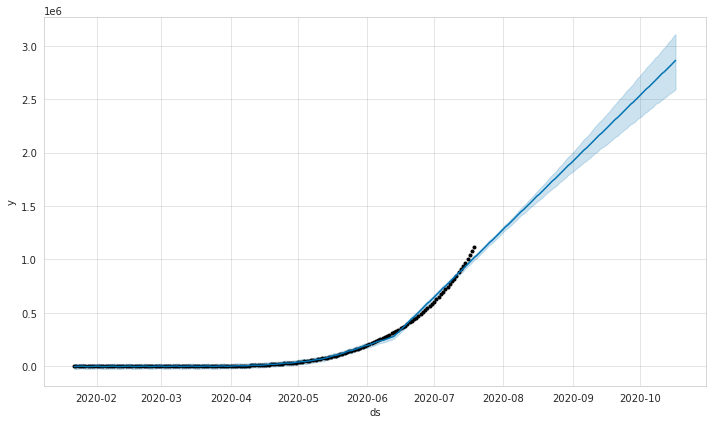

In [96]:
fig = model.plot(forecast_india_conf)

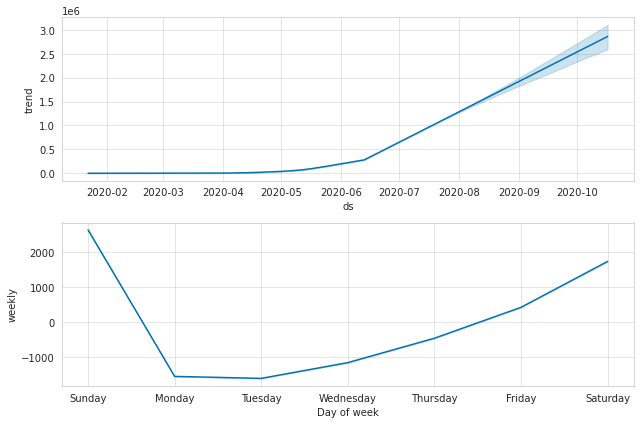

In [97]:
fig = model.plot_components(forecast_india_conf)

In [98]:
cnfrm = forecast_india_conf.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm.columns = ['Date','Confirm']
cnfrm.tail(15)

Date       Confirm
255 2020-10-03  2.574579e+06
256 2020-10-04  2.595075e+06
257 2020-10-05  2.615571e+06
258 2020-10-06  2.636066e+06
259 2020-10-07  2.656562e+06
260 2020-10-08  2.677058e+06
261 2020-10-09  2.697554e+06
262 2020-10-10  2.718050e+06
263 2020-10-11  2.738545e+06
264 2020-10-12  2.759041e+06
265 2020-10-13  2.779537e+06
266 2020-10-14  2.800033e+06
267 2020-10-15  2.820529e+06
268 2020-10-16  2.841024e+06
269 2020-10-17  2.861520e+06

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.2. Recovered Cases in India</h1>
</div>

In [99]:
pred_recover = pred_data.loc[:, ['Date', 'Recovered']]

In [100]:
pred_recover.tail()

Date  Recovered
175 2020-07-15     612768
176 2020-07-16     635757
177 2020-07-17     653751
178 2020-07-18     677423
179 2020-07-19     700087

In [101]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_recover.columns = ['ds', 'y']
model.fit(pred_recover)

In [102]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

In [103]:
forecast_india_recover = model.predict(future)

forecast_india_recover

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -6.774217e+02 -1.553099e+04  1.110349e+04 -6.774217e+02   
1   2020-01-23 -6.604392e+02 -1.392302e+04  1.294533e+04 -6.604392e+02   
2   2020-01-24 -6.434566e+02 -1.450523e+04  1.313142e+04 -6.434566e+02   
3   2020-01-25 -6.264740e+02 -1.429015e+04  1.414977e+04 -6.264740e+02   
4   2020-01-26 -6.094915e+02 -1.274950e+04  1.598128e+04 -6.094915e+02   
..         ...           ...           ...           ...           ...   
265 2020-10-13  1.869563e+06  1.705831e+06  2.037956e+06  1.704457e+06   
266 2020-10-14  1.883787e+06  1.716706e+06  2.053085e+06  1.715790e+06   
267 2020-10-15  1.898011e+06  1.724134e+06  2.074075e+06  1.727994e+06   
268 2020-10-16  1.912235e+06  1.738034e+06  2.092727e+06  1.739119e+06   
269 2020-10-17  1.926458e+06  1.749393e+06  2.107565e+06  1.750990e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -6.774217e+02     -986.076844           -986.076844           -986.076844   
1   -6.604392e+02      -93.464331            -93.464331            -93.464331   
2   -6.434566e+02      397.732262            397.732262            397.732262   
3   -6.264740e+02     1216.527290           1216.527290           1216.527290   
4   -6.094915e+02     1325.355951           1325.355951           1325.355951   
..            ...             ...                   ...                   ...   
265  2.037582e+06     -949.279348           -949.279348           -949.279348   
266  2.056261e+06     -986.076844           -986.076844           -986.076844   
267  2.071972e+06      -93.464331            -93.464331            -93.464331   
268  2.090029e+06      397.732262            397.732262            397.732262   
269  2.106227e+06     1216.527290           1216.527290           1216.527290   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -986.076844   -986.076844   -986.076844                   0.0   
1     -93.464331    -93.464331    -93.464331                   0.0   
2     397.732262    397.732262    397.732262                   0.0   
3    1216.527290   1216.527290   1216.527290                   0.0   
4    1325.355951   1325.355951   1325.355951                   0.0   
..           ...           ...           ...                   ...   
265  -949.279348   -949.279348   -949.279348                   0.0   
266  -986.076844   -986.076844   -986.076844                   0.0   
267   -93.464331    -93.464331    -93.464331                   0.0   
268   397.732262    397.732262    397.732262                   0.0   
269  1216.527290   1216.527290   1216.527290                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -1.663499e+03  
1                           0.0                         0.0 -7.539035e+02  
2                           0.0                         0.0 -2.457243e+02  
3                           0.0                         0.0  5.900532e+02  
4                           0.0                         0.0  7.158645e+02  
..                          ...                         ...           ...  
265                         0.0                         0.0  1.868614e+06  
266                         0.0                         0.0  1.882801e+06  
267                         0.0                         0.0  1.897917e+06  
268                         0.0                         0.0  1.912632e+06  
269                         0.0                         0.0  1.927675e+06  

[270 rows x 16 columns]

In [104]:
forecast_india_recover.to_csv('forecast_recovered_india.csv')

In [105]:
fig = plot_plotly(model, forecast_india_recover)

fig.update_layout(template='plotly_white', title="Total Recovered Cases India Prediction")

iplot(fig) 

In [106]:
# fig = px.scatter(forecast_india_recover, forecast.ds, forecast.trend)
# fig.show()

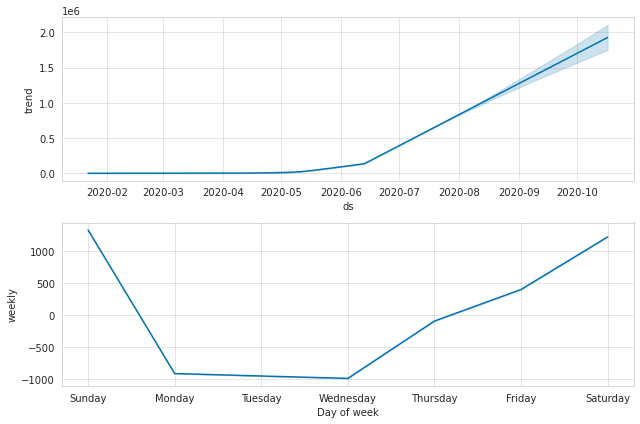

In [107]:
fig = model.plot_components(forecast_india_recover)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>6.3. Deaths in India</h1>
</div>

In [108]:
pred_deaths = pred_data.loc[:, ['Date', 'Deaths']]
pred_deaths.tail(3)

Date  Deaths
177 2020-07-17   26273
178 2020-07-18   26816
179 2020-07-19   27497

In [109]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
pred_deaths.columns = ['ds', 'y']
model.fit(pred_deaths)

In [110]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

In [111]:
forecast_india_death = model.predict(future)

forecast_india_death

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22     -8.502899   -238.433594    249.082226     -8.502899   
1   2020-01-23     -8.218883   -247.488608    248.733012     -8.218883   
2   2020-01-24     -7.934866   -248.272949    227.299218     -7.934866   
3   2020-01-25     -7.650849   -249.584094    235.594295     -7.650849   
4   2020-01-26     -7.366832   -258.560357    216.821521     -7.366832   
..         ...           ...           ...           ...           ...   
265 2020-10-13  67749.300825  61643.132787  73484.533571  61650.655061   
266 2020-10-14  68226.626971  61966.304903  74121.540417  62034.850544   
267 2020-10-15  68703.953117  62364.422585  74616.026828  62346.474296   
268 2020-10-16  69181.279263  62651.829910  75111.214561  62686.139723   
269 2020-10-17  69658.605408  63129.486484  75767.903589  63000.004452   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0       -8.502899       11.144771             11.144771             11.144771   
1       -8.218883        6.682749              6.682749              6.682749   
2       -7.934866        6.098217              6.098217              6.098217   
3       -7.650849        4.209388              4.209388              4.209388   
4       -7.366832       -0.048867             -0.048867             -0.048867   
..            ...             ...                   ...                   ...   
265  73512.709082       18.096384             18.096384             18.096384   
266  74029.965653       11.144771             11.144771             11.144771   
267  74600.051764        6.682749              6.682749              6.682749   
268  75168.858684        6.098217              6.098217              6.098217   
269  75749.679107        4.209388              4.209388              4.209388   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    11.144771     11.144771     11.144771                   0.0   
1     6.682749      6.682749      6.682749                   0.0   
2     6.098217      6.098217      6.098217                   0.0   
3     4.209388      4.209388      4.209388                   0.0   
4    -0.048867     -0.048867     -0.048867                   0.0   
..         ...           ...           ...                   ...   
265  18.096384     18.096384     18.096384                   0.0   
266  11.144771     11.144771     11.144771                   0.0   
267   6.682749      6.682749      6.682749                   0.0   
268   6.098217      6.098217      6.098217                   0.0   
269   4.209388      4.209388      4.209388                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0      2.641871  
1                           0.0                         0.0     -1.536133  
2                           0.0                         0.0     -1.836649  
3                           0.0                         0.0     -3.441461  
4                           0.0                         0.0     -7.415699  
..                          ...                         ...           ...  
265                         0.0                         0.0  67767.397209  
266                         0.0                         0.0  68237.771742  
267                         0.0                         0.0  68710.635866  
268                         0.0                         0.0  69187.377479  
269                         0.0                         0.0  69662.814796  

[270 rows x 16 columns]

In [112]:
forecast_india_death.to_csv('forecast_deaths_india.csv')

In [113]:
fig = plot_plotly(model, forecast_india_death)

fig.update_layout(template='plotly_white', title="Total Deaths in India Prediction")

iplot(fig) 

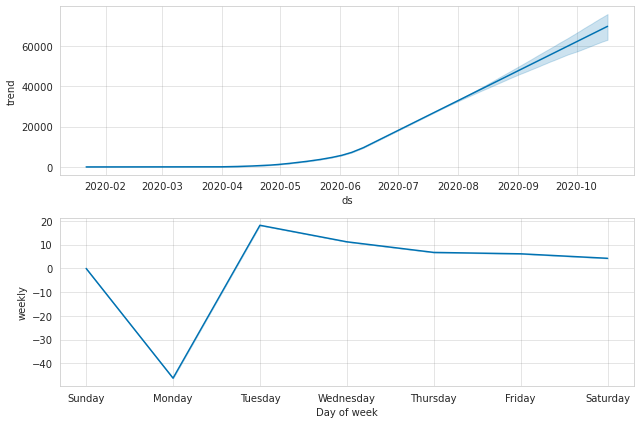

In [114]:
fig = model.plot_components(forecast_india_death)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Conclusion (India)</h1>
</div>

In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast_india_conf['ds'], 
                         y=forecast_india_conf['trend'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Predicted Confirm'))

fig.add_trace(go.Scatter(x=forecast_india_recover['ds'], 
                         y=forecast_india_recover['trend'], mode='lines+markers', 
                          marker_color='green', name='Predicted Recovered'))

fig.add_trace(go.Scatter(x=forecast_india_death['ds'], 
                         y=forecast_india_death['trend'], mode='lines+markers', 
                          marker_color='red', name='Predicted Deaths'))
fig.update_layout(title={
                  'text': "Predicted Confirmed, Recovered and Deaths in India",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>7. Making Predictions (World)</h1>
</div>

In [116]:
world_data.head(3)

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020/01/22          0   
1            NaN        Albania  41.15330  20.168300  2020/01/22          0   
2            NaN        Algeria  28.03390   1.659600  2020/01/22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa

In [117]:
world_pred = world_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

display(world_pred.head(3))
display(world_pred.tail(3))

Date  Confirmed  Deaths  Recovered  Active
0  2020/01/22        555      17         28     510
1  2020/01/23        654      18         30     606
2  2020/01/24        941      26         36     879

Date  Confirmed  Deaths  Recovered   Active
177  2020/07/17   14054555  596502    7769939  5688114
178  2020/07/18   14292178  602128    7920702  5769348
179  2020/07/19   14506747  606157    8008318  5892272

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.1. Confirmed Cases in World</h1>
</div>

In [118]:
world_pred_conf = world_pred.loc[:, ['Date', 'Confirmed']]
world_pred_conf.tail(3)

Date  Confirmed
177  2020/07/17   14054555
178  2020/07/18   14292178
179  2020/07/19   14506747

In [119]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_conf.columns = ['ds', 'y']
model.fit(world_pred_conf)

In [120]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

In [121]:
forecast_world_conf = model.predict(future)

forecast_world_conf

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.326784e+03 -1.124722e+05  7.562042e+04 -9.326784e+03   
1   2020-01-23 -6.647350e+03 -9.802313e+04  8.496265e+04 -6.647350e+03   
2   2020-01-24 -3.967916e+03 -9.267958e+04  1.017684e+05 -3.967916e+03   
3   2020-01-25 -1.288483e+03 -7.445607e+04  1.080409e+05 -1.288483e+03   
4   2020-01-26  1.390951e+03 -8.549293e+04  1.067656e+05  1.390951e+03   
..         ...           ...           ...           ...           ...   
265 2020-10-13  3.003104e+07  2.770258e+07  3.229095e+07  2.772536e+07   
266 2020-10-14  3.021545e+07  2.783978e+07  3.253294e+07  2.787054e+07   
267 2020-10-15  3.039986e+07  2.796939e+07  3.273723e+07  2.800866e+07   
268 2020-10-16  3.058428e+07  2.816098e+07  3.294603e+07  2.814550e+07   
269 2020-10-17  3.076869e+07  2.828864e+07  3.319619e+07  2.828306e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.326784e+03    -7614.598320          -7614.598320          -7614.598320   
1   -6.647350e+03     1206.647458           1206.647458           1206.647458   
2   -3.967916e+03    10465.670976          10465.670976          10465.670976   
3   -1.288483e+03    14509.602155          14509.602155          14509.602155   
4    1.390951e+03     9160.043711           9160.043711           9160.043711   
..            ...             ...                   ...                   ...   
265  3.228288e+07   -14014.620535         -14014.620535         -14014.620535   
266  3.250274e+07    -7614.598320          -7614.598320          -7614.598320   
267  3.272260e+07     1206.647458           1206.647458           1206.647458   
268  3.294238e+07    10465.670976          10465.670976          10465.670976   
269  3.316056e+07    14509.602155          14509.602155          14509.602155   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -7614.598320  -7614.598320  -7614.598320                   0.0   
1     1206.647458   1206.647458   1206.647458                   0.0   
2    10465.670976  10465.670976  10465.670976                   0.0   
3    14509.602155  14509.602155  14509.602155                   0.0   
4     9160.043711   9160.043711   9160.043711                   0.0   
..            ...           ...           ...                   ...   
265 -14014.620535 -14014.620535 -14014.620535                   0.0   
266  -7614.598320  -7614.598320  -7614.598320                   0.0   
267   1206.647458   1206.647458   1206.647458                   0.0   
268  10465.670976  10465.670976  10465.670976                   0.0   
269  14509.602155  14509.602155  14509.602155                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -1.694138e+04  
1                           0.0                         0.0 -5.440702e+03  
2                           0.0                         0.0  6.497755e+03  
3                           0.0                         0.0  1.322112e+04  
4                           0.0                         0.0  1.055099e+04  
..                          ...                         ...           ...  
265                         0.0                         0.0  3.001702e+07  
266                         0.0                         0.0  3.020784e+07  
267                         0.0                         0.0  3.040107e+07  
268                         0.0                         0.0  3.059474e+07  
269                         0.0                         0.0  3.078320e+07  

[270 rows x 16 columns]

In [122]:
forecast_world_conf[['ds', 'trend']].to_csv('forecast_world_conf.csv')

In [123]:
fig = plot_plotly(model, forecast_world_conf)

fig.update_layout(template='plotly_white')

iplot(fig) 

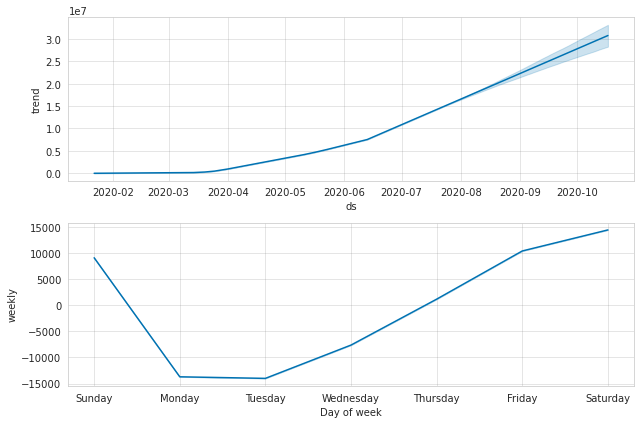

In [124]:
fig = model.plot_components(forecast_world_conf)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.2. Recovered Cases in World</h1>
</div>

In [125]:
world_pred_recover = world_pred.loc[:, ['Date', 'Recovered']]
world_pred_recover.tail(3)

Date  Recovered
177  2020/07/17    7769939
178  2020/07/18    7920702
179  2020/07/19    8008318

In [126]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_recover.columns = ['ds', 'y']
model.fit(world_pred_recover)

In [127]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

In [128]:
forecast_world_recover = model.predict(future)

forecast_world_recover

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -1.493327e+04 -9.747759e+04  7.113195e+04 -1.493327e+04   
1   2020-01-23 -1.365843e+04 -8.742844e+04  6.874731e+04 -1.365843e+04   
2   2020-01-24 -1.238359e+04 -8.866244e+04  8.092315e+04 -1.238359e+04   
3   2020-01-25 -1.110875e+04 -8.365792e+04  7.843674e+04 -1.110875e+04   
4   2020-01-26 -9.833916e+03 -8.996670e+04  7.419425e+04 -9.833916e+03   
..         ...           ...           ...           ...           ...   
265 2020-10-13  1.831426e+07  1.687146e+07  1.966864e+07  1.689061e+07   
266 2020-10-14  1.843611e+07  1.694743e+07  1.983883e+07  1.698637e+07   
267 2020-10-15  1.855796e+07  1.708894e+07  1.998994e+07  1.708064e+07   
268 2020-10-16  1.867981e+07  1.715593e+07  2.012464e+07  1.717494e+07   
269 2020-10-17  1.880166e+07  1.725864e+07  2.029374e+07  1.727022e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -1.493327e+04    -2866.853507          -2866.853507          -2866.853507   
1   -1.365843e+04     3320.526158           3320.526158           3320.526158   
2   -1.238359e+04     5805.629667           5805.629667           5805.629667   
3   -1.110875e+04     9768.393401           9768.393401           9768.393401   
4   -9.833916e+03      230.468566            230.468566            230.468566   
..            ...             ...                   ...                   ...   
265  1.969386e+07    -7689.186805          -7689.186805          -7689.186805   
266  1.984047e+07    -2866.853507          -2866.853507          -2866.853507   
267  1.996659e+07     3320.526158           3320.526158           3320.526158   
268  2.010781e+07     5805.629667           5805.629667           5805.629667   
269  2.025567e+07     9768.393401           9768.393401           9768.393401   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -2866.853507  -2866.853507  -2866.853507                   0.0   
1    3320.526158   3320.526158   3320.526158                   0.0   
2    5805.629667   5805.629667   5805.629667                   0.0   
3    9768.393401   9768.393401   9768.393401                   0.0   
4     230.468566    230.468566    230.468566                   0.0   
..           ...           ...           ...                   ...   
265 -7689.186805  -7689.186805  -7689.186805                   0.0   
266 -2866.853507  -2866.853507  -2866.853507                   0.0   
267  3320.526158   3320.526158   3320.526158                   0.0   
268  5805.629667   5805.629667   5805.629667                   0.0   
269  9768.393401   9768.393401   9768.393401                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -1.780012e+04  
1                           0.0                         0.0 -1.033790e+04  
2                           0.0                         0.0 -6.577962e+03  
3                           0.0                         0.0 -1.340360e+03  
4                           0.0                         0.0 -9.603447e+03  
..                          ...                         ...           ...  
265                         0.0                         0.0  1.830658e+07  
266                         0.0                         0.0  1.843325e+07  
267                         0.0                         0.0  1.856128e+07  
268                         0.0                         0.0  1.868562e+07  
269                         0.0                         0.0  1.881143e+07  

[270 rows x 16 columns]

In [129]:
fig = plot_plotly(model, forecast_world_recover)

fig.update_layout(template='plotly_white')

iplot(fig) 

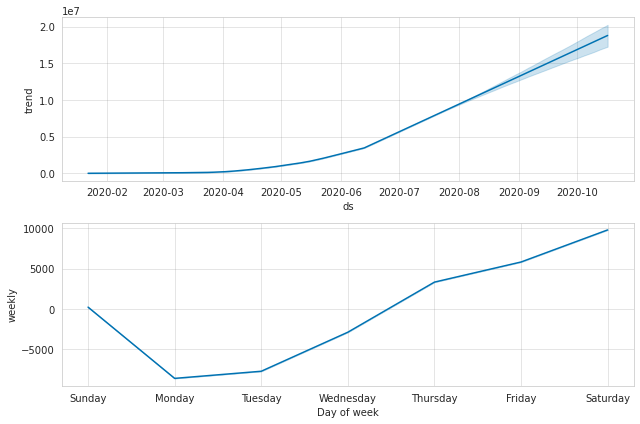

In [130]:
fig = model.plot_components(forecast_world_recover)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>7.3. Deaths in World</h1>
</div>

In [131]:
world_pred_death = world_pred.loc[:, ['Date', 'Deaths']]
world_pred_death.tail(3)

Date  Deaths
177  2020/07/17  596502
178  2020/07/18  602128
179  2020/07/19  606157

In [132]:
model = Prophet()

# Dataframe must have columns "ds" and "y" with the dates and values respectively for prophet prediction
world_pred_death.columns = ['ds', 'y']
model.fit(world_pred_death)

In [133]:
future = model.make_future_dataframe(periods=90)
future.tail()

ds
265 2020-10-13
266 2020-10-14
267 2020-10-15
268 2020-10-16
269 2020-10-17

In [134]:
forecast_world_death = model.predict(future)

forecast_world_death

ds         trend     yhat_lower    yhat_upper    trend_lower  \
0   2020-01-22 -3.294277e+02   -1206.908150  5.618236e+02    -329.427679   
1   2020-01-23 -2.597420e+02    -783.977882  1.042725e+03    -259.742034   
2   2020-01-24 -1.900564e+02    -283.142140  1.502259e+03    -190.056389   
3   2020-01-25 -1.203707e+02    -370.056491  1.423078e+03    -120.370743   
4   2020-01-26 -5.068510e+01   -1167.060369  7.014193e+02     -50.685098   
..         ...           ...            ...           ...            ...   
265 2020-10-13  1.017705e+06  882944.995682  1.139132e+06  883590.396507   
266 2020-10-14  1.022520e+06  886591.196936  1.146715e+06  887666.549077   
267 2020-10-15  1.027336e+06  891150.132418  1.155492e+06  889518.886469   
268 2020-10-16  1.032152e+06  890887.457434  1.163979e+06  890942.460859   
269 2020-10-17  1.036968e+06  893798.371222  1.171135e+06  892925.031030   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -3.294277e+02       -8.410242             -8.410242             -8.410242   
1   -2.597420e+02      356.030743            356.030743            356.030743   
2   -1.900564e+02      754.105535            754.105535            754.105535   
3   -1.203707e+02      625.244840            625.244840            625.244840   
4   -5.068510e+01     -199.397274           -199.397274           -199.397274   
..            ...             ...                   ...                   ...   
265  1.139531e+06     -510.112709           -510.112709           -510.112709   
266  1.147170e+06       -8.410242             -8.410242             -8.410242   
267  1.154662e+06      356.030743            356.030743            356.030743   
268  1.162777e+06      754.105535            754.105535            754.105535   
269  1.169956e+06      625.244840            625.244840            625.244840   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     -8.410242     -8.410242     -8.410242                   0.0   
1    356.030743    356.030743    356.030743                   0.0   
2    754.105535    754.105535    754.105535                   0.0   
3    625.244840    625.244840    625.244840                   0.0   
4   -199.397274   -199.397274   -199.397274                   0.0   
..          ...           ...           ...                   ...   
265 -510.112709   -510.112709   -510.112709                   0.0   
266   -8.410242     -8.410242     -8.410242                   0.0   
267  356.030743    356.030743    356.030743                   0.0   
268  754.105535    754.105535    754.105535                   0.0   
269  625.244840    625.244840    625.244840                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -3.378379e+02  
1                           0.0                         0.0  9.628871e+01  
2                           0.0                         0.0  5.640491e+02  
3                           0.0                         0.0  5.048741e+02  
4                           0.0                         0.0 -2.500824e+02  
..                          ...                         ...           ...  
265                         0.0                         0.0  1.017194e+06  
266                         0.0                         0.0  1.022512e+06  
267                         0.0                         0.0  1.027692e+06  
268                         0.0                         0.0  1.032906e+06  
269                         0.0                         0.0  1.037593e+06  

[270 rows x 16 columns]

In [135]:
fig = plot_plotly(model, forecast_world_death)

fig.update_layout(template='plotly_white')

iplot(fig) 

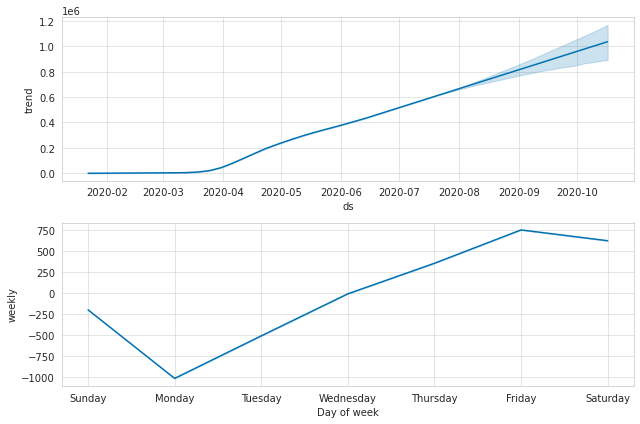

In [136]:
fig = model.plot_components(forecast_world_death)

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Conclusion (World)</h1>
</div>

In [137]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast_world_conf['ds'], 
                         y=forecast_world_conf['trend'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Predicted Confirm'))

fig.add_trace(go.Scatter(x=forecast_world_recover['ds'], 
                         y=forecast_world_recover['trend'], mode='lines+markers', 
                          marker_color='green', name='Predicted Recovered'))

fig.add_trace(go.Scatter(x=forecast_world_death['ds'], 
                         y=forecast_world_death['trend'], mode='lines+markers', 
                          marker_color='red', name='Predicted Deaths'))
fig.update_layout(title={
                  'text': "Predicted Confirmed, Recovered and Deaths in World",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  height=650,
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana">
    <h1 style='color:white;'>ARIMA</h1>
</div>

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Confirmed Cases India</h1>
</div>

In [138]:
pred_data = india_data.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum().reset_index()

pred_data['Active'] = pred_data['Confirmed'] - (pred_data['Deaths'] + pred_data['Recovered'])

pred_data['Date'] = pred_data['Date'].apply(pd.to_datetime, dayfirst=True)

In [139]:
pred_data.sample(frac=0.1)

Date  Confirmed  Recovered  Deaths  Active
29  2020-02-20          3          3       0       0
146 2020-06-16     354065     186935   11903  155227
169 2020-07-09     793802     495513   21604  276685
148 2020-06-18     380532     204711   12573  163248
23  2020-02-14          3          0       0       3
131 2020-06-01     198370      95754    5608   97008
88  2020-04-19      17615       2854     559   14202
21  2020-02-12          3          0       0       3
128 2020-05-29     173491      82627    4980   85884
117 2020-05-18     100328      39233    3156   57939
27  2020-02-18          3          3       0       0
65  2020-03-27        887         73      20     794
170 2020-07-10     820916     515386   22123  283407
151 2020-06-21     425282     237196   13699  174387
106 2020-05-07      56351      16776    1889   37686
16  2020-02-07          3          0       0       3
34  2020-02-25          3          3       0       0
124 2020-05-25     144950      60706    4172   80072

In [140]:
pred_data.tail()

Date  Confirmed  Recovered  Deaths  Active
175 2020-07-15     968857     612768   24914  331175
176 2020-07-16    1003832     635757   25602  342473
177 2020-07-17    1039084     653751   26273  359060
178 2020-07-18    1077781     677423   26816  373542
179 2020-07-19    1118206     700087   27497  390622

In [141]:
india_conf = pred_data[['Date', 'Confirmed']].copy()

In [142]:
india_conf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       180 non-null    datetime64[ns]
 1   Confirmed  180 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9 KB


In [143]:
arima = ARIMA(india_conf['Confirmed'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred_ar_conf = list(forecast[0])

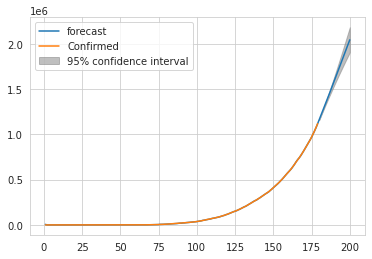

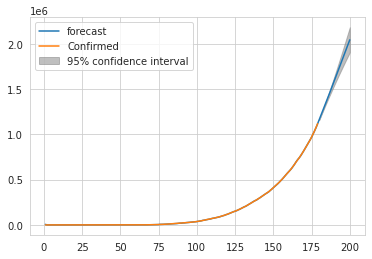

In [144]:
arima.plot_predict(1,200)

In [145]:
start_date = india_conf['Date'].max()
prediction_dates = []

for i in range(90):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

In [146]:
arima_conf_pred = pd.DataFrame({'Date':prediction_dates, 'Trend':pred_ar_conf})
arima_conf_pred.to_csv('arima_confirm_pred.csv')

In [147]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred_ar_conf, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Confirmed'))

fig.add_trace(go.Scatter(y=india_conf['Confirmed'],x=india_conf['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Confirmed'))


fig.update_layout(title={
                  'text': "Actual Confirmed vs Predicted Confirmed in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Recovered Cases India</h1>
</div>

In [148]:
india_rec = pred_data[['Date', 'Recovered']].copy()

In [149]:
arima = ARIMA(india_rec['Recovered'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

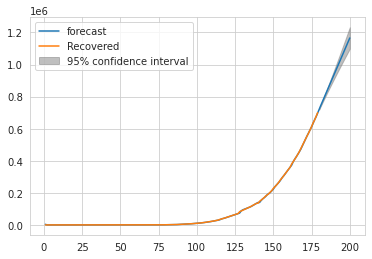

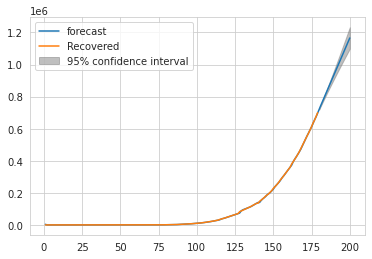

In [150]:
arima.plot_predict(1,200)

In [151]:
start_date = india_rec['Date'].max()
prediction_dates = []

for i in range(90):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

In [152]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='mediumslateblue', name='Predicted Recovered'))

fig.add_trace(go.Scatter(y=india_rec['Recovered'],x=india_rec['Date'], mode='lines+markers', 
                          marker_color='green', name='Actual Recovered'))


fig.update_layout(title={
                  'text': "Actual Recovered vs Predicted Recovered in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Deaths In India</h1>
</div>

In [153]:
india_deaths = pred_data[['Date', 'Deaths']].copy()

In [154]:
arima = ARIMA(india_deaths['Deaths'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

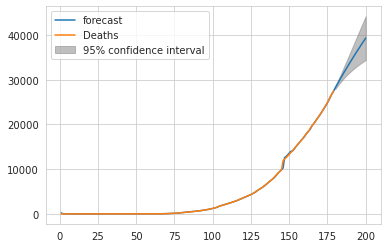

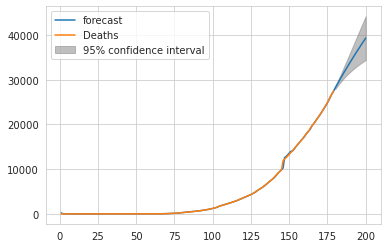

In [155]:
arima.plot_predict(1,200)

In [156]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Deaths'))

fig.add_trace(go.Scatter(y=india_deaths['Deaths'],x=india_deaths['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Deaths'))


fig.update_layout(title={
                  'text': "Actual Deaths vs Predicted Deaths in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

<div style="color:white;
           padding:8px 10px 0 10px;
           display:inline-block;
           border-radius:5px;
           background-color:#EC2566;
           font-size:90%;
           font-family:Verdana">
    <h1 style='color:white;'>Active In India</h1>
</div>

In [157]:
india_active = pred_data[['Date', 'Active']].copy()

In [158]:
arima = ARIMA(india_active['Active'], order=(5, 1, 0))
arima = arima.fit(trend='c', full_output=True, disp=True)
forecast = arima.forecast(steps= 90)
pred = list(forecast[0])

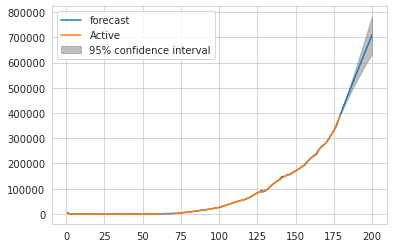

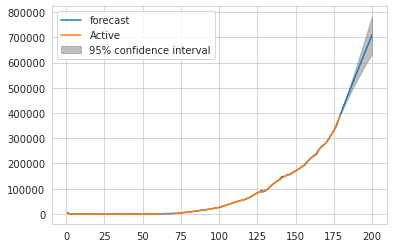

In [159]:
arima.plot_predict(1,200)

In [160]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= pred, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Active Cases'))

fig.add_trace(go.Scatter(y=india_active['Active'],x=india_active['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Active Cases'))


fig.update_layout(title={
                  'text': "Actual Active Cases vs Predicted Active Cases in India (ARIMA)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

# Linear Regression Prediction (India)

In [161]:
pred_data['day'] = pred_data['Date'].dt.day
pred_data['month'] = pred_data['Date'].dt.month
pred_data['dayofyear'] = pred_data['Date'].dt.dayofyear
pred_data['dayofweek'] = pred_data['Date'].dt.dayofweek
pred_data['weekofyear'] = pred_data['Date'].dt.weekofyear

In [162]:
pred_data.tail()

Date  Confirmed  Recovered  Deaths  Active  day  month  dayofyear  \
175 2020-07-15     968857     612768   24914  331175   15      7        197   
176 2020-07-16    1003832     635757   25602  342473   16      7        198   
177 2020-07-17    1039084     653751   26273  359060   17      7        199   
178 2020-07-18    1077781     677423   26816  373542   18      7        200   
179 2020-07-19    1118206     700087   27497  390622   19      7        201   

     dayofweek  weekofyear  
175          2          29  
176          3          29  
177          4          29  
178          5          29  
179          6          29

In [163]:
pred_data['Date'].tail()

175   2020-07-15
176   2020-07-16
177   2020-07-17
178   2020-07-18
179   2020-07-19
Name: Date, dtype: datetime64[ns]

In [164]:
my_pred = pred_data.copy()

In [165]:
my_pred.tail()

Date  Confirmed  Recovered  Deaths  Active  day  month  dayofyear  \
175 2020-07-15     968857     612768   24914  331175   15      7        197   
176 2020-07-16    1003832     635757   25602  342473   16      7        198   
177 2020-07-17    1039084     653751   26273  359060   17      7        199   
178 2020-07-18    1077781     677423   26816  373542   18      7        200   
179 2020-07-19    1118206     700087   27497  390622   19      7        201   

     dayofweek  weekofyear  
175          2          29  
176          3          29  
177          4          29  
178          5          29  
179          6          29

In [166]:
del my_pred['Date']

In [167]:
my_pred.columns

Index(['Confirmed', 'Recovered', 'Deaths', 'Active', 'day', 'month',
       'dayofyear', 'dayofweek', 'weekofyear'],
      dtype='object')

In [168]:
train_my_pred = my_pred[['day', 'month',
       'dayofyear', 'dayofweek', 'weekofyear']]
target_conf = my_pred['Confirmed']

In [169]:
future = future[future['ds'] > '2020-07-18']

future.ds

179   2020-07-19
180   2020-07-20
181   2020-07-21
182   2020-07-22
183   2020-07-23
         ...    
265   2020-10-13
266   2020-10-14
267   2020-10-15
268   2020-10-16
269   2020-10-17
Name: ds, Length: 91, dtype: datetime64[ns]

In [170]:
future['day'] = future['ds'].dt.day
future['month'] = future['ds'].dt.month
future['dayofyear'] = future['ds'].dt.dayofyear
future['dayofweek'] = future['ds'].dt.dayofweek
future['weekofyear'] = future['ds'].dt.weekofyear

In [171]:
future.head()

ds  day  month  dayofyear  dayofweek  weekofyear
179 2020-07-19   19      7        201          6          29
180 2020-07-20   20      7        202          0          30
181 2020-07-21   21      7        203          1          30
182 2020-07-22   22      7        204          2          30
183 2020-07-23   23      7        205          3          30

In [172]:
future_dates =  future['ds']
del future['ds']

In [173]:
lr = LinearRegression()

In [174]:
lr.fit(train_my_pred, target_conf)

LinearRegression()

In [175]:
lr_preds = lr.predict(future)

In [176]:
lr_csv = pd.DataFrame({'Date':future_dates, 'Trend':lr_preds + (target_conf.max() - lr_preds.min())})
lr_csv.to_csv('linear_reg_pred.csv')

In [177]:
display(target_conf.max())
display(lr_preds.min())
display(target_conf.max() - lr_preds.min())

1118206

538493.3168388633

579712.6831611367

In [178]:
fig = px.line(x=future_dates , y=lr_preds + (target_conf.max() - lr_preds.min()), color_discrete_sequence=["red"])

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Linear Regression Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

# Lasso Prediction (India)

In [179]:
train_my_pred

day  month  dayofyear  dayofweek  weekofyear
0     22      1         22          2           4
1     23      1         23          3           4
2     24      1         24          4           4
3     25      1         25          5           4
4     26      1         26          6           4
..   ...    ...        ...        ...         ...
175   15      7        197          2          29
176   16      7        198          3          29
177   17      7        199          4          29
178   18      7        200          5          29
179   19      7        201          6          29

[180 rows x 5 columns]

In [180]:
target_conf

0            0
1            0
2            0
3            0
4            0
        ...   
175     968857
176    1003832
177    1039084
178    1077781
179    1118206
Name: Confirmed, Length: 180, dtype: int64

In [181]:
future

day  month  dayofyear  dayofweek  weekofyear
179   19      7        201          6          29
180   20      7        202          0          30
181   21      7        203          1          30
182   22      7        204          2          30
183   23      7        205          3          30
..   ...    ...        ...        ...         ...
265   13     10        287          1          42
266   14     10        288          2          42
267   15     10        289          3          42
268   16     10        290          4          42
269   17     10        291          5          42

[91 rows x 5 columns]

In [182]:
lasso = Lasso()
lasso.fit(train_my_pred, target_conf)
lasso_preds = lasso.predict(future)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2418351148002.394, tolerance: 1335281034.118091



In [183]:
lasso_csv = pd.DataFrame({'Date':future_dates, 'Trend':lasso_preds + (target_conf.max() - lasso_preds.min())})
lasso_csv.to_csv('lasso_reg_pred.csv')

In [184]:
fig = px.line(x=future_dates , y=lasso_preds + (target_conf.max() - lasso_preds.min()), color_discrete_sequence=["blue"])

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Lasso Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

# Ridge Prediction (India)

In [185]:
ridge = Ridge()
ridge.fit(train_my_pred, target_conf)
ridge_preds = ridge.predict(future)

In [186]:
ridge_csv = pd.DataFrame({'Date':future_dates, 'Trend':ridge_preds + (target_conf.max() - ridge_preds.min())})
ridge_csv.to_csv('ridge_reg_pred.csv')

In [187]:
fig = px.line(x=future_dates , y=ridge_preds + (target_conf.max() - ridge_preds.min()), color_discrete_sequence=["green"], log_y=True)

fig.update_traces(mode='lines+markers', line_shape='linear')
fig.update_layout(title='Ridge Prediction',
                 yaxis_title='Total Cases',
                 xaxis_title='Progression Over Time',
                 template='ggplot2',
                 )
fig.show()

In [188]:
# forecast_india_conf = forecast_india_conf[forecast_india_conf['ds'] > '2020-07-18']
# forecast_india_conf

In [189]:
forecast_india_conf = forecast_india_conf[forecast_india_conf['ds'] > '2020-07-18']
forecast_india_conf['trend'].iloc[179:]

Series([], Name: trend, dtype: float64)

# Bigger Picture

In [190]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= lr_preds + (target_conf.max() - lr_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Linear Regression'))

fig.add_trace(go.Scatter(y= lasso_preds + (target_conf.max() - lasso_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='blue', name='Lasso Regression'))

fig.add_trace(go.Scatter(y= ridge_preds + (target_conf.max() - ridge_preds.min()), 
                         x= future_dates, 
                         mode='lines+markers', 
                         marker_color='green', name='Ridge Regression'))


fig.add_trace(go.Scatter(y= pred_ar_conf, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='Orange', name='ARIMA'))

fig.add_trace(go.Scatter(x=forecast_india_conf['ds'], 
                         y=forecast_india_conf['trend'], mode='lines+markers', 
                          marker_color='purple', name='Prophet'))

fig.update_layout(template='ggplot2', title='Comparing All Models (Confirmed Cases)', 
                  height=900,
                 xaxis=dict(
                            autorange=True,
                            range=["2020-07-05", "2020-10-04"],
                            rangeslider=dict(
                                autorange=True,
                                range=["2020-07-05", "2020-10-04"]
                            ),
                            type="date"
                        ))
fig.update_traces(textposition='top center')

# Blending Models

In [191]:
def blended_predictions(X):
    return ((0.33 * lr.predict(X)) + \
            (0.34 * lasso.predict(X)) + \
            (0.33 * ridge.predict(X)))

In [192]:
blended_csv = pd.DataFrame({'Date':future_dates, 'Trend':blended_predictions(future) + (target_conf.max() - blended_predictions(future).min())})
blended_csv.to_csv('blended_pred.csv')

In [193]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= blended_predictions(future) + (target_conf.max() - blended_predictions(future).min()), 
                         x= future_dates,
                         mode='lines+markers', 
                         marker_color='#F64B50', name='Blended Prediction'))

fig.update_layout(template='ggplot2', title='Combining all the models (Blended Prediction)', showlegend=True,
                  height=700,
                 xaxis=dict(
                            autorange=True,
                            range=["2020-07-05", "2020-10-04"],
                            rangeslider=dict(
                                autorange=True,
                                range=["2020-07-05", "2020-10-04"]
                            ),
                            type="date"
                        ))
fig.update_traces(textposition='top center')

## AutoRegressive

In [194]:
from statsmodels.tsa.ar_model import AutoReg

model_autor = AutoReg(india_conf['Confirmed'], lags=1)
model_autor_fit = model_autor.fit()

autor_preds = model_autor_fit.predict(start=len(india_conf['Confirmed']), end=len(india_conf['Confirmed']) + 90)
autor_preds

180    1.157548e+06
181    1.198253e+06
182    1.240369e+06
183    1.283945e+06
184    1.329032e+06
           ...     
266    2.198533e+07
267    2.274797e+07
268    2.353704e+07
269    2.435346e+07
270    2.519817e+07
Length: 91, dtype: float64

In [195]:
fig = go.Figure()

fig.add_trace(go.Scatter(y= autor_preds, 
                         x= prediction_dates, 
                         mode='lines+markers', 
                         marker_color='red', name='Predicted Confirmed'))

fig.add_trace(go.Scatter(y=india_conf['Confirmed'],x=india_conf['Date'], mode='lines+markers', 
                          marker_color='mediumslateblue', name='Actual Confirmed'))


fig.update_layout(title={
                  'text': "Predicted Confirmed in India (Auto Regressive)",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'},
                  plot_bgcolor='rgb(275, 275, 275)', 
                  template='plotly_white')

fig.show()

In [196]:
# train_my_pred target_conf

# X_train, X_valid, y_train, y_valid = train_test_split(train_my_pred, target_conf, test_size=0.2, train_size=0.8)

In [197]:
# lr = LinearRegression()

In [198]:
# lr.fit(X_train, y_train)

In [199]:
# pred = lr.predict(X_valid)

In [200]:
# mae = mean_absolute_error(pred, y_valid)
# mae